In [1]:
import xml.etree.ElementTree as element
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
tree = element.parse('./data_watch/exportacion.xml') 
# for every health record, extract the attributes
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

In [3]:
record_data = pd.DataFrame(record_list)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    record_data[col] = pd.to_datetime(record_data[col])

# value is numeric, NaN if fails
record_data['value'] = pd.to_numeric(record_data['value'], errors='coerce')

# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
record_data['value'] = record_data['value'].fillna(1.0)

# shorter observation names
record_data['type'] = record_data['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data['type'] = record_data['type'].str.replace('HKCategoryTypeIdentifier', '')
record_data['startDate'] = record_data['startDate'].dt.tz_localize(None)
record_data.head()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,Height,iPhone de Jav,16.1.2,cm,2022-12-03 17:16:18+01:00,2022-12-03 17:16:18,2022-12-03 17:16:18+01:00,189.0,NaN
1,BodyMass,iPhone de Jav,16.1.2,kg,2022-12-03 17:16:18+01:00,2022-12-03 17:16:18,2022-12-03 17:16:18+01:00,88.0,NaN
2,HeartRate,Mi Fitness,2,count/min,2022-12-15 22:24:46+01:00,2022-12-15 00:00:00,2022-12-15 01:00:00+01:00,56.0,NaN
3,HeartRate,Mi Fitness,2,count/min,2022-12-15 22:24:46+01:00,2022-12-15 00:00:00,2022-12-15 01:00:00+01:00,76.0,NaN
4,HeartRate,Mi Fitness,2,count/min,2022-12-15 22:24:46+01:00,2022-12-15 00:00:00,2022-12-15 01:00:00+01:00,88.0,NaN


In [4]:
heart_rate= record_data[record_data["type"]=='HeartRate']
heart_rate.index.name="index"
heart_rate=heart_rate.rename(columns={"value": "hr", "startDate": "datetime"})
visualizing_heart=heart_rate.drop(['type',"sourceName",'sourceVersion',"unit",'creationDate','endDate','device'],axis=1)

In [10]:
heart_rate['hr'][:20]

C:\Users\javier\AppData\Local\Temp\ipykernel_4536\3338815785.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  heart_rate['hr'][:20]


index
2      56.0
3      76.0
4      88.0
5      88.0
6      48.0
7      68.0
8      51.0
9      69.0
10     44.0
11     68.0
12     53.0
13     66.0
14     44.0
15     67.0
16     50.0
17     75.0
18     49.0
19     80.0
20     65.0
21    119.0
Name: hr, dtype: float64

C:\Users\javier\AppData\Local\Temp\ipykernel_4536\3707390238.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(heart_rate['datetime'][:40],heart_rate['hr'][:40])


(array([19341.        , 19341.08333333, 19341.16666667, 19341.25      ,
        19341.33333333, 19341.41666667, 19341.5       , 19341.58333333,
        19341.66666667, 19341.75      ]),
 [Text(19341.0, 0, '2022-12-15 00:00:00'),
  Text(19341.083333333332, 0, '2022-12-15 02:00:00'),
  Text(19341.166666666668, 0, '2022-12-15 04:00:00'),
  Text(19341.25, 0, '2022-12-15 06:00:00'),
  Text(19341.333333333332, 0, '2022-12-15 08:00:00'),
  Text(19341.416666666668, 0, '2022-12-15 10:00:00'),
  Text(19341.5, 0, '2022-12-15 12:00:00'),
  Text(19341.583333333332, 0, '2022-12-15 14:00:00'),
  Text(19341.666666666668, 0, '2022-12-15 16:00:00'),
  Text(19341.75, 0, '2022-12-15 18:00:00')])

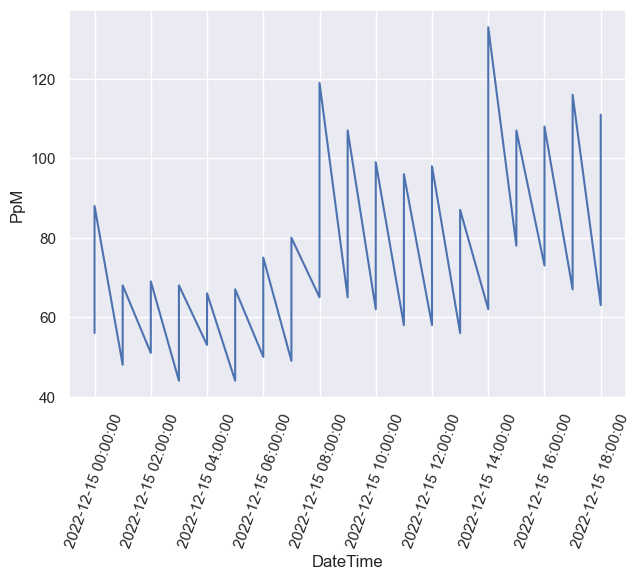

In [14]:
import matplotlib.dates as dates
plt.plot(heart_rate['datetime'][:40],heart_rate['hr'][:40])
plt.xlabel('DateTime')
plt.ylabel('PpM')
formatter = dates.DateFormatter('%Y-%m-%d %H:%M:%S') 
# plt.autoscale(enable=True, axis='x', tight=True)#plt.axis('tight')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.xticks(rotation=70)